In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_expuestos = pd.read_csv("data/BD_Expuestos.csv", delimiter="\t", parse_dates=["FECHA_INICIO", "FECHA_CANCELACION", "FECHA_FIN"])

df_costos = pd.read_csv("data/BD_costos_medicos.csv", delimiter=";")

df_sociodem = pd.read_csv("data/BD_Sociodemograficas.csv", encoding="latin-1", delimiter="\t", parse_dates=["FechaNacimiento"])

df_sin = pd.read_csv("data/DB_Siniestros.csv", parse_dates=["Mes_Pago"], date_format="%Y%m")

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12992\1794333538.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sociodem = pd.read_csv("data/BD_Sociodemograficas.csv", encoding="latin-1", delimiter="\t", parse_dates=["FechaNacimiento"])


## Expuestos

In [ ]:
df_expuestos.head()

,Asegurado_Id,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,FECHA_FIN
0,16286173,125696117,2018-01-01,2018-04-10,2018-04-10
1,11885152,141320760,2018-01-01,2019-12-31,2019-12-31
2,763957,162532851,2018-01-01,2019-12-31,2019-12-31
3,29082204,154620473,2018-01-01,2018-04-19,2018-04-19
4,4567640,93633862,2018-01-01,2019-12-31,2019-12-31


In [ ]:
df_expuestos[~(df_expuestos["FECHA_CANCELACION"] == df_expuestos["FECHA_FIN"])].dropna()
# Completar valores nulos de fecha de cancelacion con valores en fecha fin
df_expuestos["FECHA_CANCELACION"] = df_expuestos["FECHA_CANCELACION"].fillna(df_expuestos["FECHA_FIN"])

# df_expuestos.drop("FECHA_FIN", axis=1, inplace=True)

## Costos

In [6]:
data = df_costos[["genero", "costo"]]

# sns.boxplot(data=data, x="genero", y="costo");

# sns.histplot(data=data, x="costo", hue="genero", kde=True);

df_costos

,edad,genero,ciudad,hijos,diabetico,imc,costo
0,19,femenino,bogota,0,si,28,73111720
1,18,masculino,medellin,1,no,34,7471641
2,28,masculino,medellin,3,no,33,19266170
3,33,masculino,cali,0,no,23,95192757
4,32,masculino,cali,0,no,29,16743483
...,...,...,...,...,...,...,...
1336,21,femenino,bogota,0,no,26,8694401
1337,61,femenino,cali,0,si,29,126182090
1338,56,femenino,medellin,0,no,40,48022808
1339,58,masculino,cartagena,0,no,25,51661772


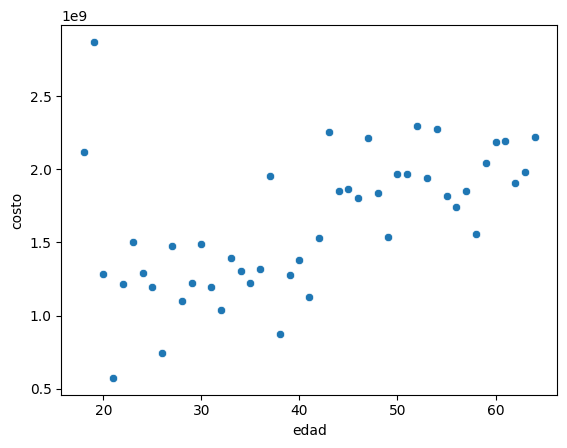

In [ ]:
data = df_costos.groupby("edad", as_index=False)["costo"].sum()

# data["costo"] = data["costo"]/df_costos["costo"].sum()

sns.scatterplot(data=data, x="edad", y="costo");

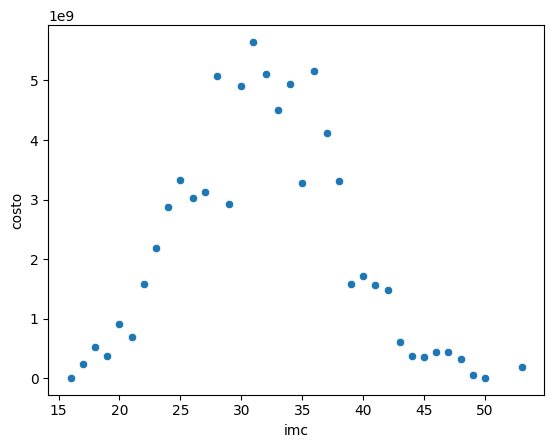

In [ ]:
data = df_costos.groupby("imc", as_index=False)["costo"].sum()


sns.scatterplot(data=data, x="imc", y="costo");



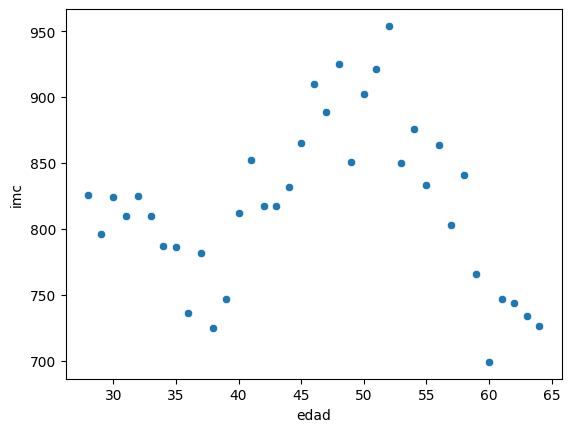

In [ ]:
data = df_costos.groupby("edad", as_index=False)["imc"].sum()

# data["costo"] = data["costo"]/df_costos["costo"].sum()

sns.scatterplot(data=data.loc[10:], x="edad", y="imc");

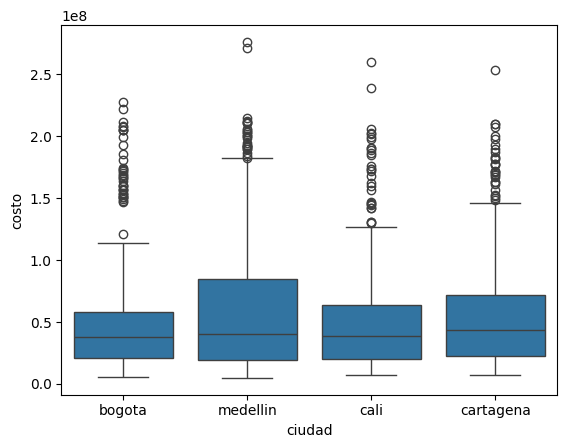

In [ ]:
data = df_costos[["ciudad", "costo"]]


sns.boxplot(data=data, x="ciudad", y="costo");




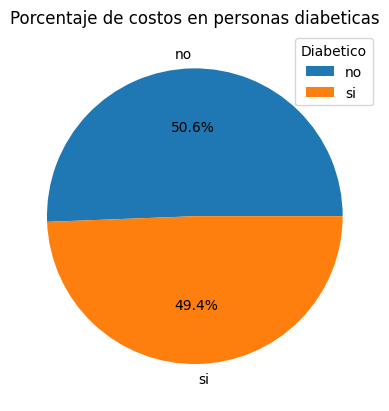

In [ ]:
data = df_costos.groupby("diabetico", as_index=False)["costo"].sum()

plt.pie(data["costo"], labels=data["diabetico"], autopct="%1.1f%%")
plt.legend(title="Diabetico")

plt.title("Porcentaje de costos en personas diabeticas");



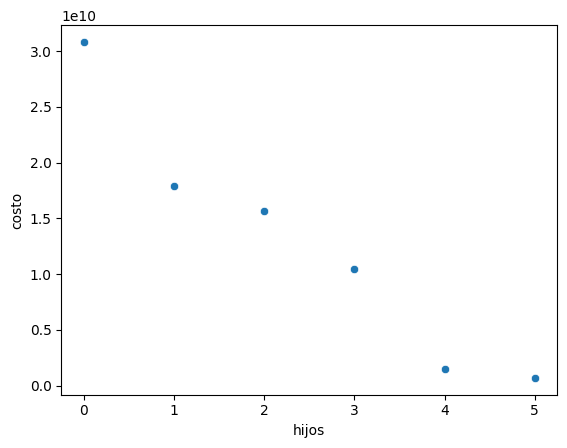

In [ ]:
data = df_costos.groupby("hijos", as_index=False)["costo"].sum()

sns.scatterplot(data=data, x="hijos", y="costo");


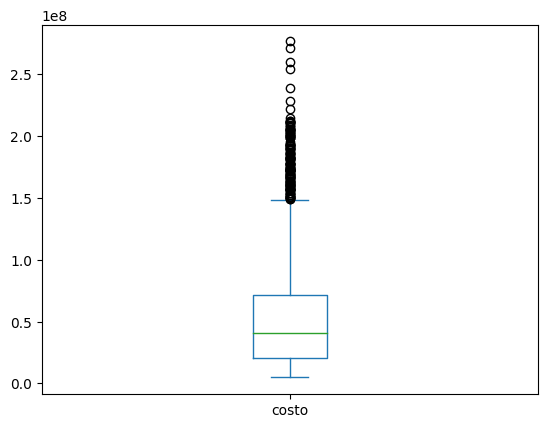

In [ ]:
df_costos["costo"].plot(kind="box");

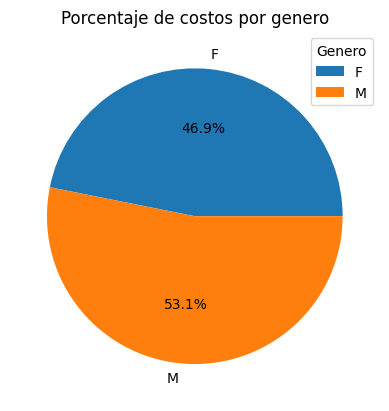

In [ ]:
data = df_costos.groupby("genero", as_index=False)["costo"].sum()

plt.pie(data["costo"], labels=data["genero"].str[0].str.upper(), autopct="%1.1f%%")
plt.legend(title="Genero")

plt.title("Porcentaje de costos por genero");



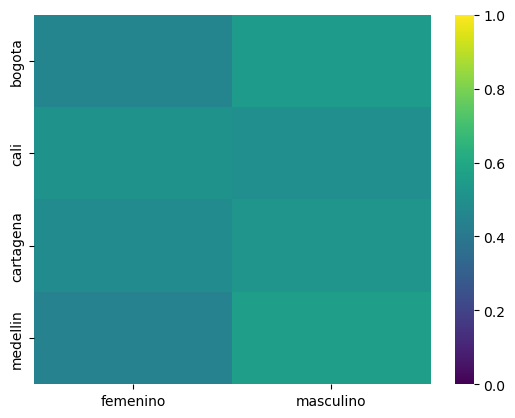

In [3]:
# df_costos.groupby(["ciudad", "genero"], as_index=False)["costo"].sum()

data = pd.pivot_table(df_costos, values="costo", index="ciudad", columns=["genero"], aggfunc="sum")#/df_costos.groupby("ciudad")["costo"].sum()

data.columns.name = ""

data.index.name = ""

data = data/df_costos.groupby("ciudad")["costo"].sum().values.reshape(-1, 1)

sns.heatmap(data, cmap="viridis", annot=False, vmin=0, vmax=1);



## Sociodemo



## Siniestros

In [ ]:
# Cambiar columna mes de pago a formato fecha
df_sin["Mes_Pago"] = pd.to_datetime(df_sin["Mes_Pago"], format="%Y%m")



,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado
0,2019-11-01,36097886,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,4.382564e+05
1,2019-07-01,16233410,CONSULTA DE URGENCIAS,9,DIAGNÓSTICO PENDIENTE,1,4.254439e+05
2,2019-11-01,50042180,EXAMENES DE DIAGNOSTICO,Z017,EXAMEN DE LABORATORIO,1,3.933619e+05
3,2018-10-01,21620355,CONSULTAS PRENATALES,9,DIAGNÓSTICO PENDIENTE,3,6.083371e+05
4,2019-12-01,16454934,INFILTRACIONES,9,DIAGNÓSTICO PENDIENTE,3,1.067658e+06
...,...,...,...,...,...,...,...
89995,2019-10-01,48950421,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,2,3.905634e+05
89996,2018-11-01,5517153,EXAMENES DE DIAGNOSTICO,9,DIAGNÓSTICO PENDIENTE,1,1.037092e+06
89997,2019-02-01,18199608,EXAMENES DE DIAGNOSTICO,Z014,EXAMEN GINECOLÓGICO (GENERAL) (DE RUTINA),1,5.242507e+05
89998,2019-10-01,35642630,CONSULTA EXTERNA,9,DIAGNÓSTICO PENDIENTE,1,4.382564e+05
